### **Step 1**

Install the package "ISLR" in order to obtain the selected dataset in the following steps.


In [1]:
install.packages("ISLR", quiet=TRUE)

Add global options for aestetics in order to make all the future plots have the same width and the same font size for their titles, labels and axes:

In [2]:
options(width=140)

font_size_title = 1.5
font_size_labels = 1.5
font_size_axis = 1.5

###**Step 2**
Now, we load the package with the library function. Then, access the selected dataset "Carseats" from the "ISLR" package that was installed before. Then, save the dataset as a global variable `df`.

In [3]:
library(ISLR)
data(package = "ISLR")

df <- Carseats

At this stage, let us look at the structure of the recieved data:

In [8]:
str(df)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


As we can see from the output of `str(df)` function, the data are organized in a data frame, where each row represents an observation (or simply, a case) and each column represents a variable (or a feature). Moreover, we can see that the data frame includes 400 observations and 11 variables. We have also recieved all the variables and their types, along with values of the first few observations.

Such variables as Sales, CompPrice, Income, Advertising, Population, Prie, Age and Education are numerical (quantitative), while ShaveLoc, Urban and US variables are categorical (qualitative). Shaveloc variable has an inherent ordering: "Bad", "Good and "Medium". The same is true for "Urban" and "US": these variables have 2 levels: "No" and "yes".

Now, let us look at factor variables closer. Consider "US": how many stores that sale child carseats are in the USA and how many are not? Apply `table()` function to answer the question.

In [10]:
table(df$US)


 No Yes 
142 258 

So, 258 shops are in the US, while 142 are outside it.

Now, what if we want to know the number of the US urban shops that sell the child car seats? We can use the filter function in the `dplyr package` to obtain a subset of urban US shops (the function will filter the data for cases where "US" == "Yes" and "Urban" == "Yes").

In [12]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [22]:
df_US <- df %>%
  filter(US == "Yes" & Urban == "Yes")

# Drop levels
df_US$number_dropped <- droplevels(df_US$US)

# Table of the number_dropped variable
table(df_US$number_dropped)


Yes 
186 

As we can see from the output, 186 shops out of 400 are in the US urban area.

Finally, let us look at the first 10 rows of our data.

In [9]:
head(df, 10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,6.63,115,105,0,45,108,Medium,71,15,Yes,No
8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
9,6.54,132,110,0,108,124,Medium,76,10,No,No


###**Step 3**

In [ ]:
install.packages("caret", quiet=TRUE)

In [33]:
install.packages("corrgram", quiet = TRUE)

In [6]:
library(ggplot2)

Load data

In [10]:
length(factor(df[['Age']]))

[1] 400

In [11]:
length(factor(df[['Sales']])) == nrow(df)

[1] TRUE

In [12]:
colnames(df)


[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population"  "Price"       "ShelveLoc"   "Age"         "Education"  
[10] "Urban"       "US"

### **Summary statistics**


**Exercise:** Pick a variable and evaluate its distribution just by assessing its basic statistics. You will need to make various hypotheses. The more the better ;) Don't forget that these are just hypotheses.

In [13]:
print(summary(df))

     Sales          CompPrice       Income        Advertising       Population        Price        ShelveLoc        Age       
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000   Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000   1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000   Median :272.0   Median :117.0   Medium:219   Median :54.50  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635   Mean   :264.8   Mean   :115.8                Mean   :53.32  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000   3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000   Max.   :509.0   Max.   :191.0                Max.   :80.00  
   Education    Urban       US     
 Min.   :10.0   No :118   No :142  
 1st Qu.:12.0   Yes:282   Yes:258  
 Me

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


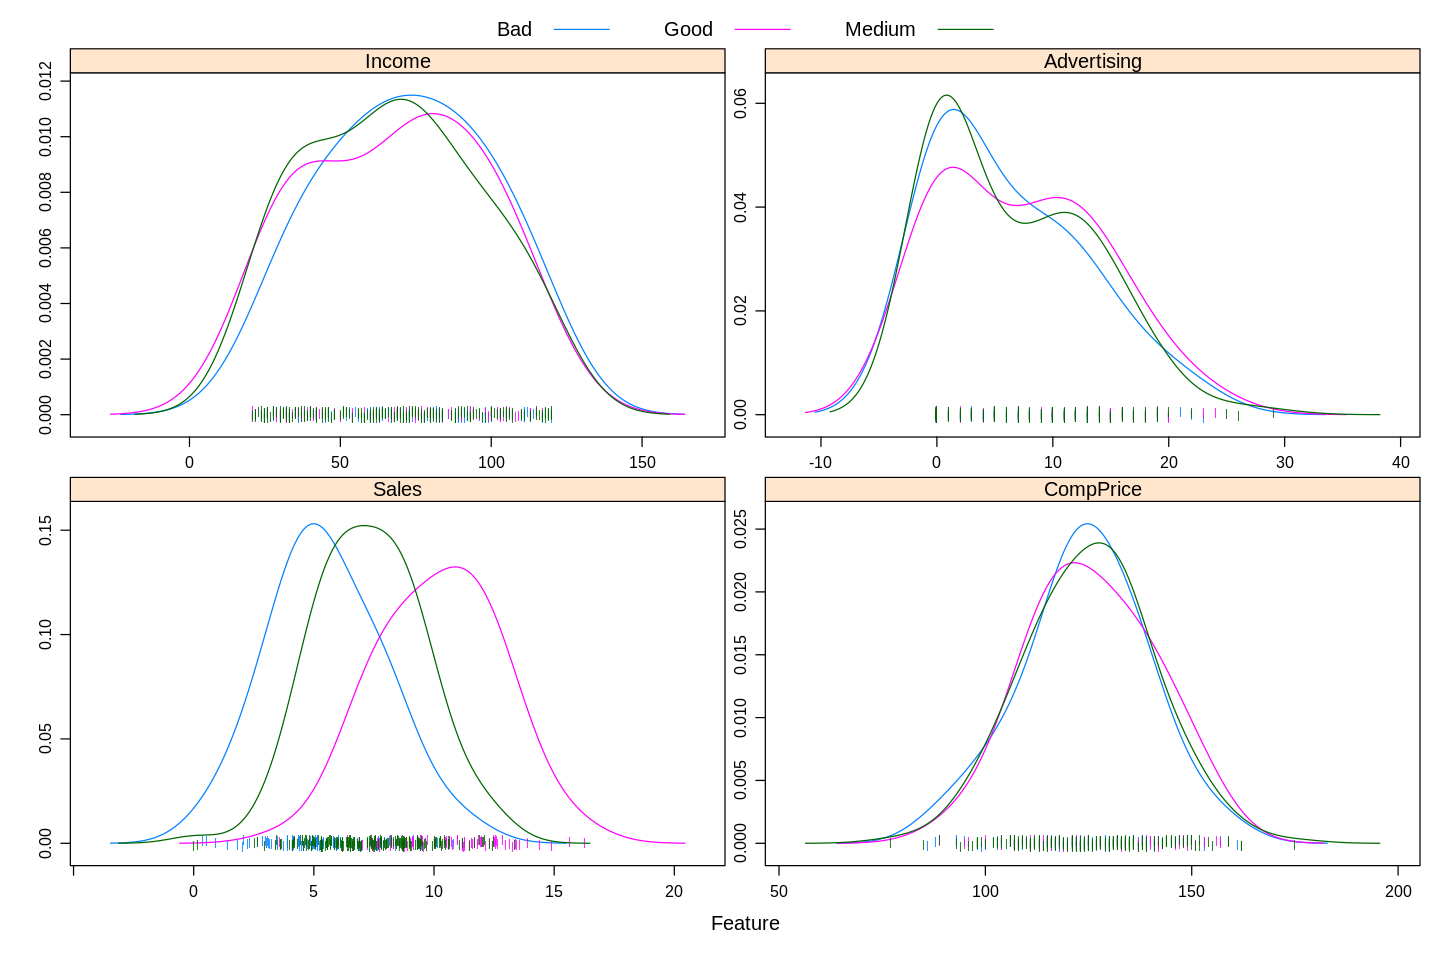

In [14]:


library(caret)

options(repr.plot.width=12, repr.plot.height=8)

featurePlot(x = df[, c("Sales", "CompPrice", 
                                    "Income", "Advertising")],
                   y = df$ShelveLoc,
                   plot = "density", 
                   scales = list(x = list(relation = "free"), 
                                 y = list(relation = "free")), 
                   adjust = 1.5, 
                   pch = "|", 
                   layout = c(2, 2), 
                   auto.key = list(columns = 3)
                   )                

`geom_smooth()` using formula 'y ~ x'



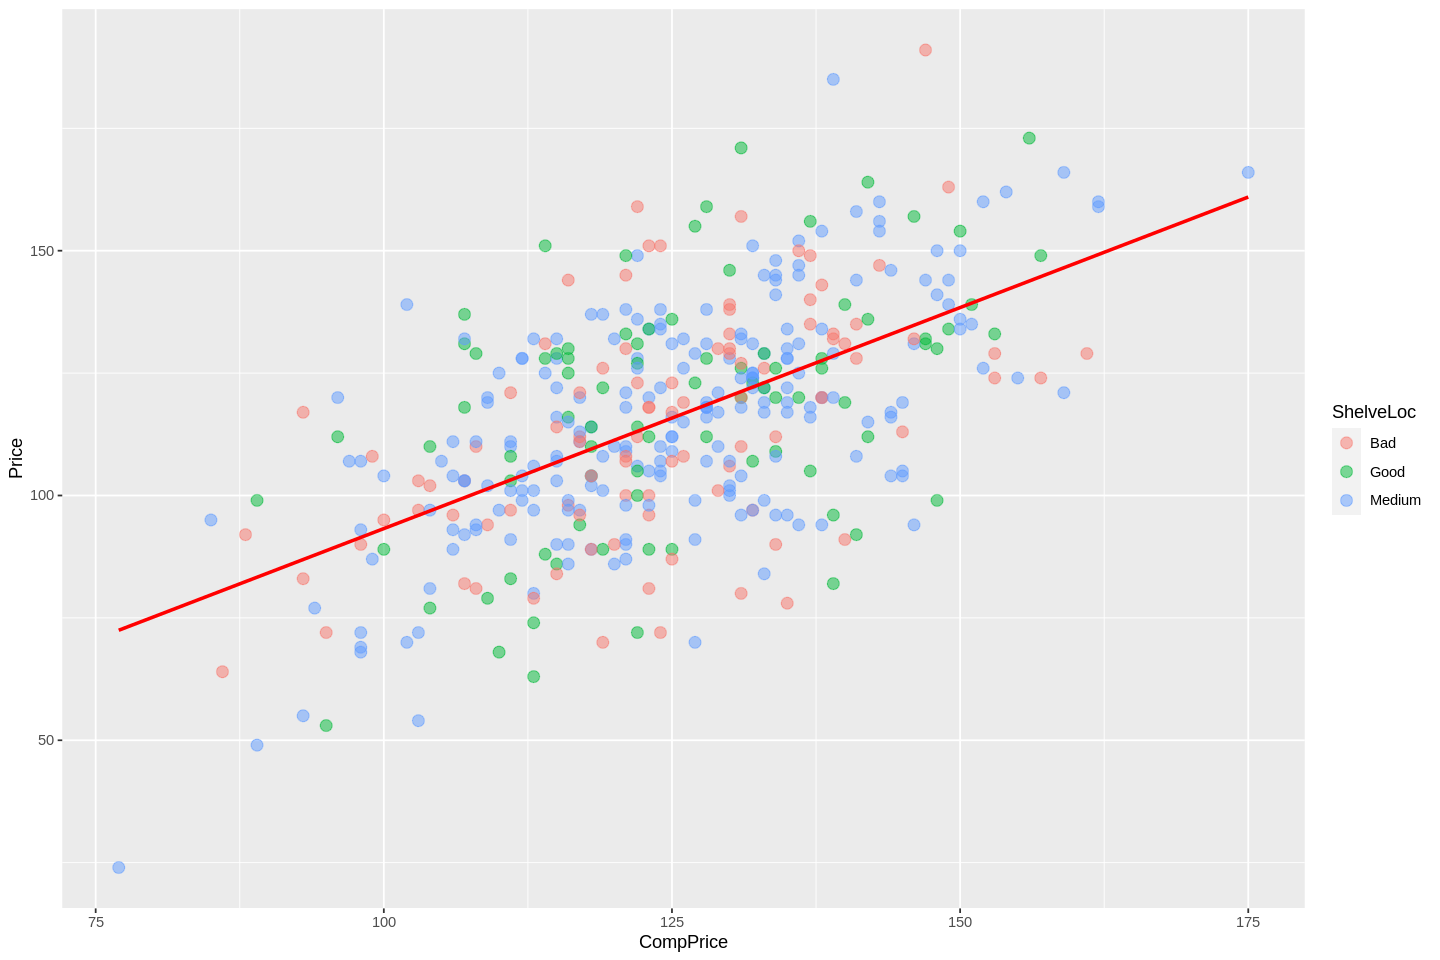

In [15]:
# Plot price vs. carat, colored by clarity
plt_price_vs_carat_by_clarity <- ggplot(df, aes(x = CompPrice, y = Price, color = ShelveLoc))

# Add a point layer with tiny points
plt_price_vs_carat_by_clarity + geom_point(alpha = 0.5, size = 3) + stat_smooth(method = "lm", color = "red", se = FALSE)


Correlation is moderate positive:

In [16]:
cor(df$Price, df$CompPrice)

[1] 0.5848478

`geom_smooth()` using formula 'y ~ x'



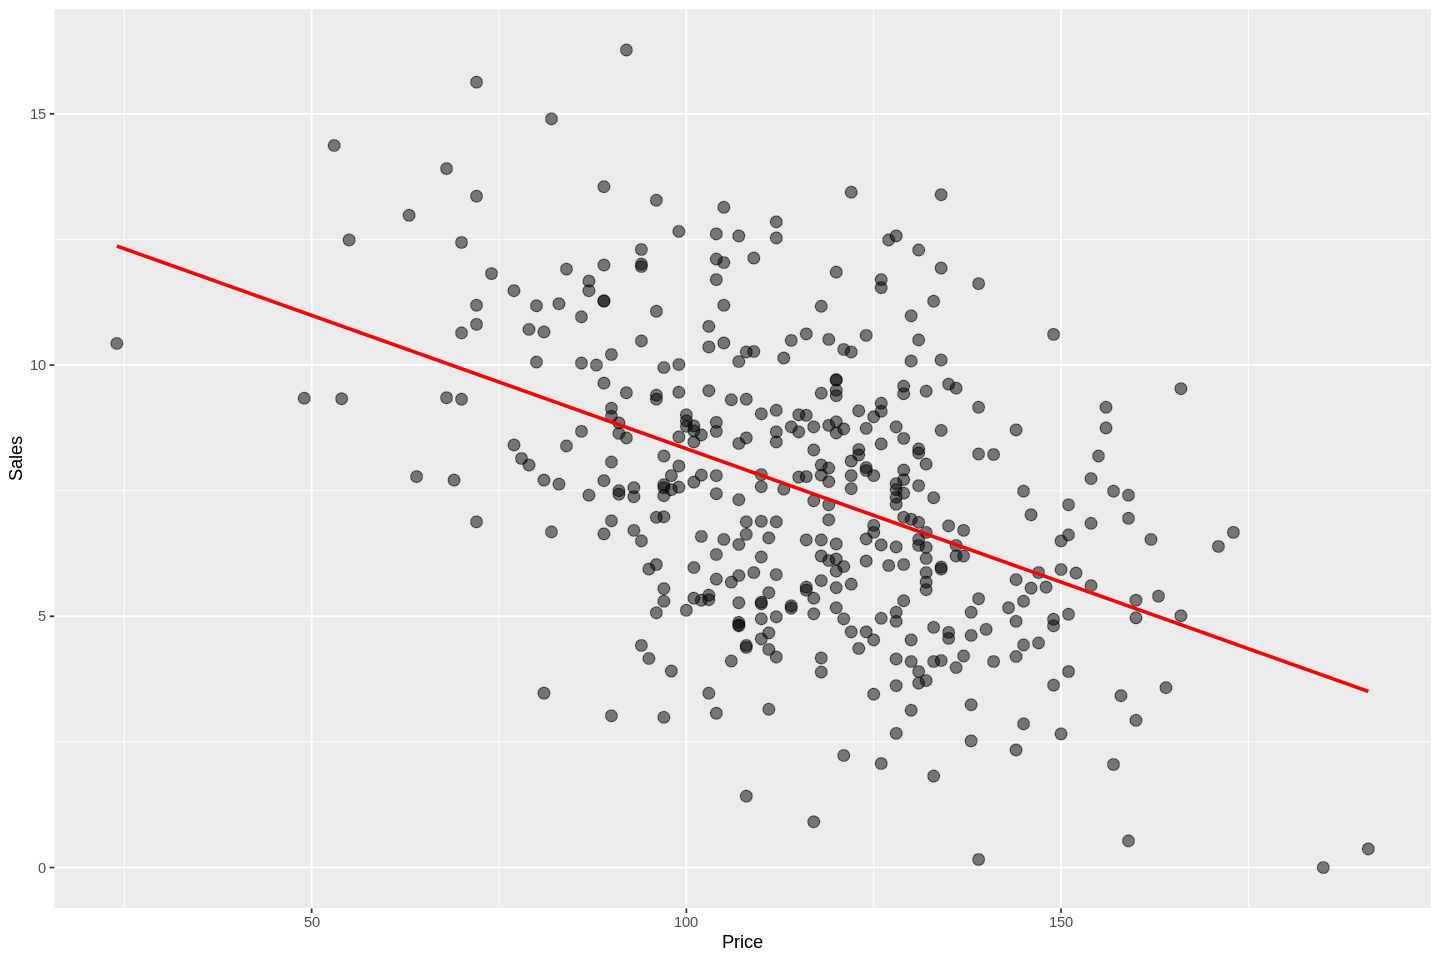

In [17]:
# Plot price vs. carat, colored by clarity
plt_price_vs_carat_by_clarity <- ggplot(df, aes(y = Sales, x = Price))

# Add a point layer with tiny points
plt_price_vs_carat_by_clarity + geom_point(alpha = 0.5, size = 3) + stat_smooth(method = "lm", color = "red", se = FALSE)

Is there any correlation? Low negative correlation

In [18]:
cor(df$Price, df$Sales)

[1] -0.4449507

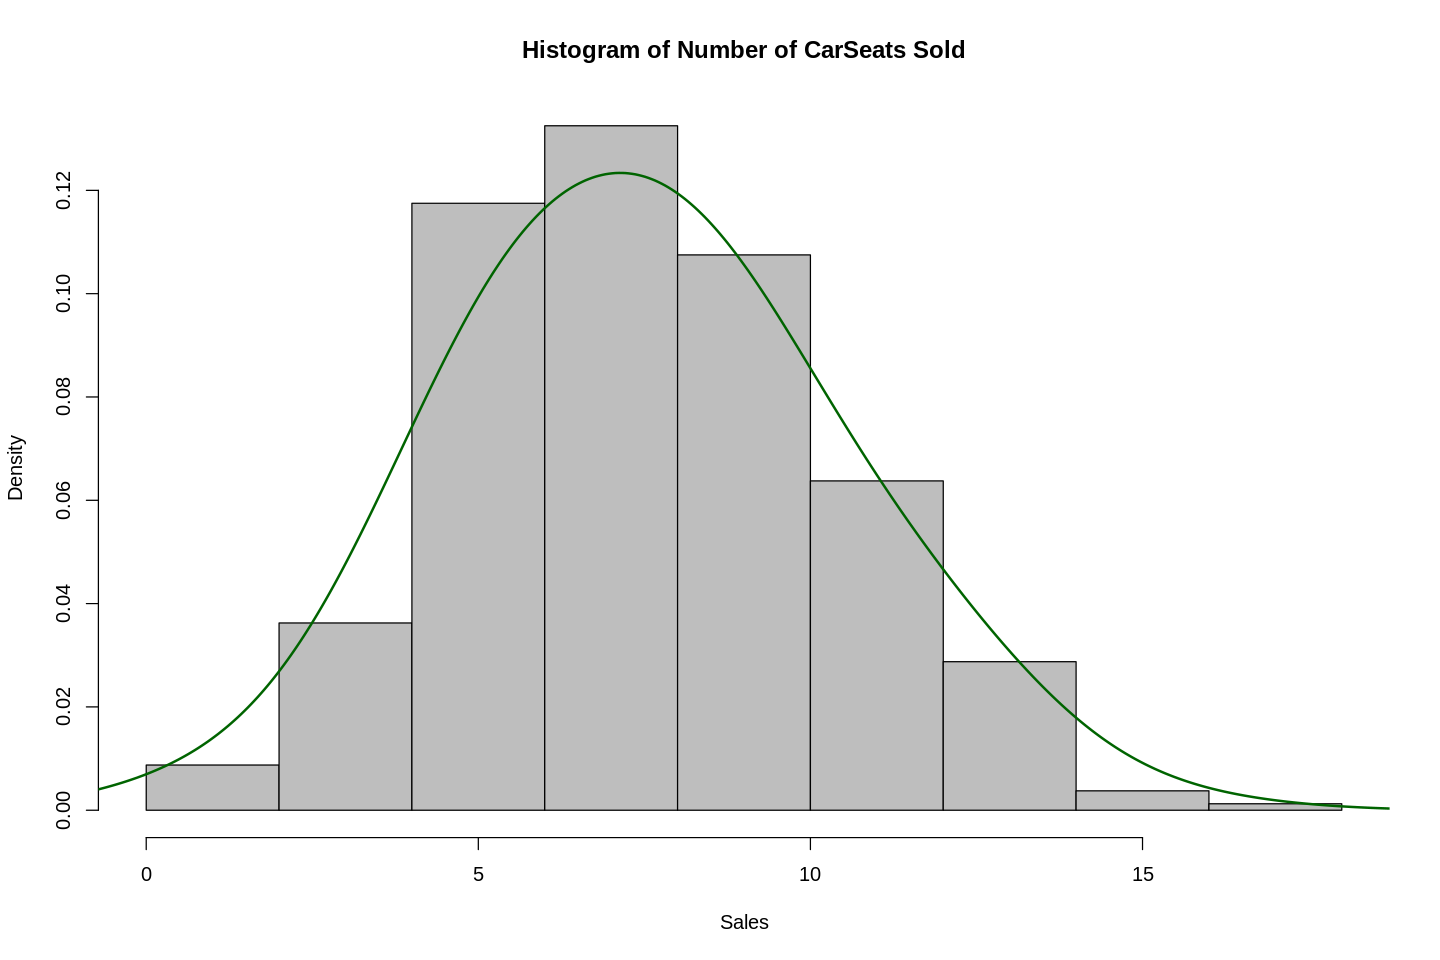

In [24]:
X <- df$Sales
hist(X, prob=TRUE, col="grey", main="Histogram of Number of CarSeats Sold", xlab ="Sales")
#hist(X, main="Histogram of Number of CarSeats Sold", xlab ="Sales") 
#lines(density(X), col="blue", lwd=2) # add a density estimate with defaults
lines(density(X, adjust=2), col="darkgreen", lwd=2) #lty="dotted",


Model with selected predictors: Price, Urban, US 

###**NICE IDEA**

In [21]:
print(summary(df))

     Sales          CompPrice       Income        Advertising       Population        Price        ShelveLoc        Age       
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000   Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000   1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000   Median :272.0   Median :117.0   Medium:219   Median :54.50  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635   Mean   :264.8   Mean   :115.8                Mean   :53.32  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000   3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000   Max.   :509.0   Max.   :191.0                Max.   :80.00  
   Education    Urban       US     
 Min.   :10.0   No :118   No :142  
 1st Qu.:12.0   Yes:282   Yes:258  
 Me

CompPrice and Price do have close values for median and mean: (write the same thing for my case) are "close" to each other (in IQR unit of 29-17=12). So, mpg is from an approximately symmetric sample distribution with a slight right skew or outliers (because med < mean). In fact, min is 14 units away from the mean of 23.45 and ~23 units away from max value. So, the mean is pulled to the right by (likely) a single large outlier of 46.60. 

a box plot will be nice here (with all these outliers)

some regression here is a good idea

[1] 0.006488032

lapply() sapply() or vapply() for showing all the correlations

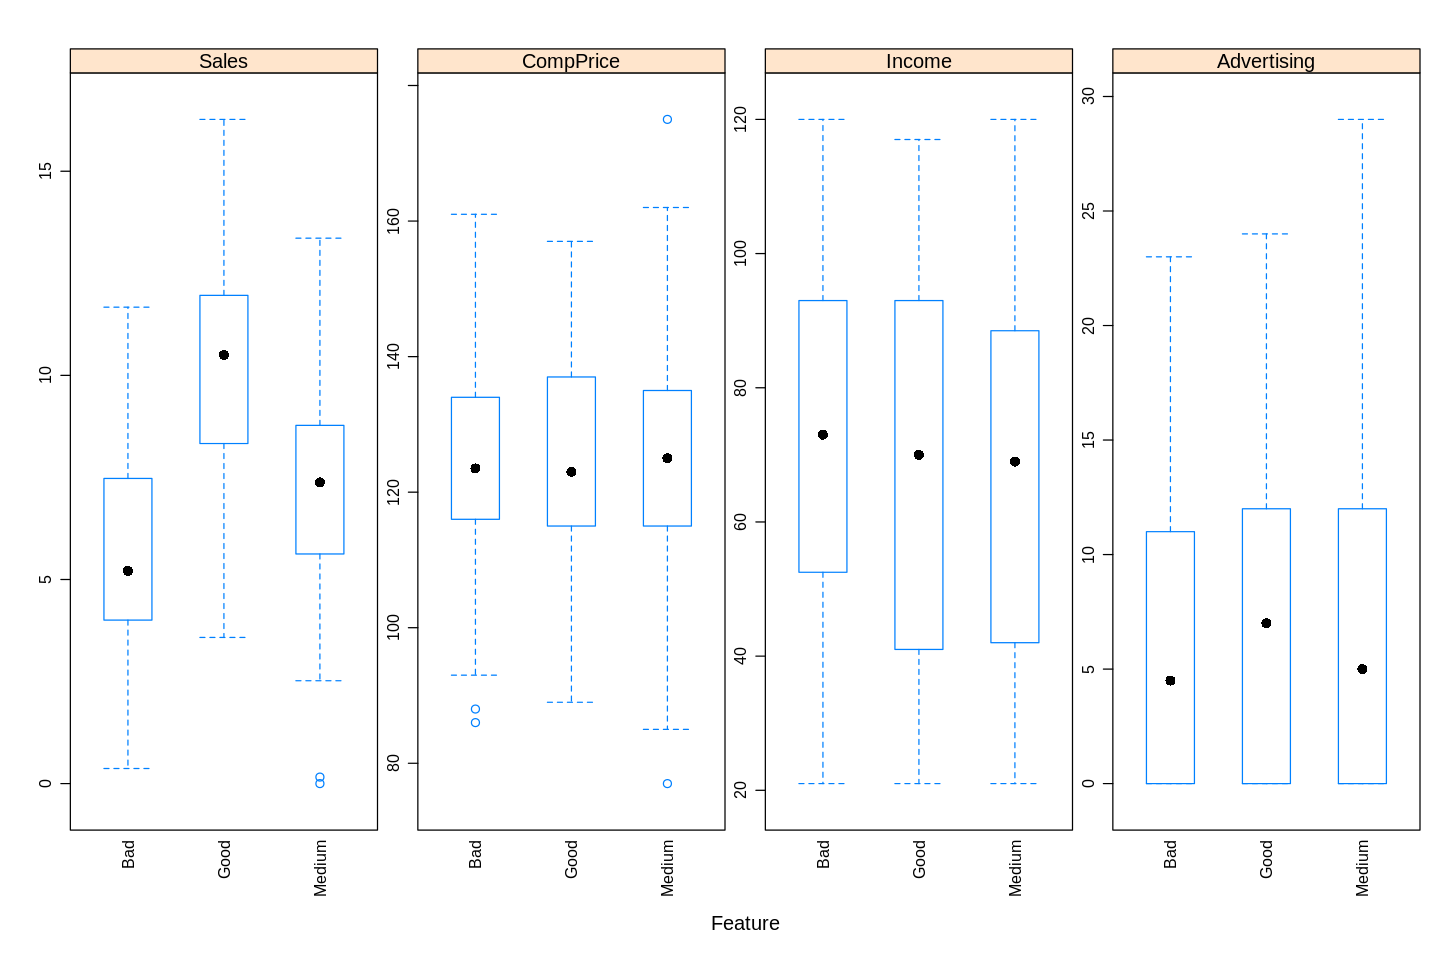

In [28]:


featurePlot(x = df[, c("Sales", "CompPrice", 
                                    "Income", "Advertising")], 
                   y = df$ShelveLoc,
                   plot = "box",
                   scales = list(y = list(relation = "free"),
                                 x = list(rot = 90)),
                   layout = c(4, 1))


Attaching package: ‘corrgram’


The following object is masked from ‘package:lattice’:

    panel.fill




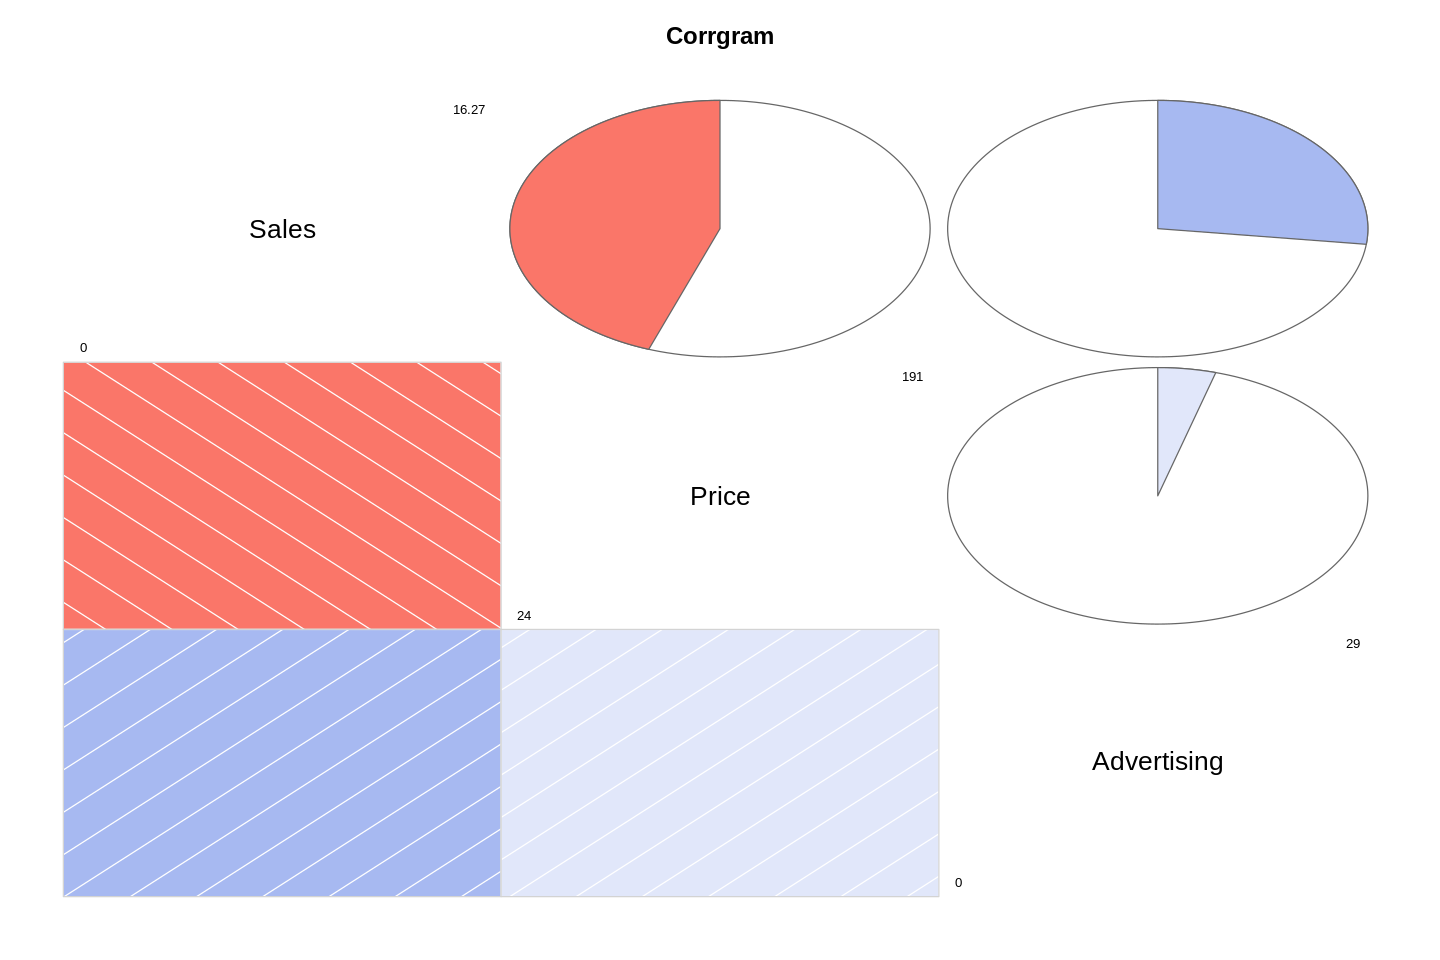

In [34]:
library(corrgram)
corrgram(df[,c("Sales","Price","Advertising")], order=FALSE, 
         lower.panel=panel.shade,
         upper.panel=panel.pie, 
         diag.panel=panel.minmax,
         text.panel=panel.txt,
         main="Corrgram")

Check is it possible to predict MPG from other car attributes and evaluate model's performance (perhaps in comparison to alternative models or choices of hyperparameters)

### **Tasks**

**Exercise 1:** Pick a variable and evaluate its distribution just by assessing its basic statistics. You will need to make various hypotheses. The more the better ;) Don't forget that these are just hypotheses.
